<a href="https://colab.research.google.com/github/fahiiim/Multimodal-Retrival-Augmented-generation-Technique/blob/main/Multimodal_RAG_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up Envioronment
https://www.analyticsvidhya.com/blog/2024/09/guide-to-building-multimodal-rag-systems/

In [1]:
!pip install langchain-community
!pip install langchain-openai
!pip install langchain-Chroma
!pip install langchain-experimental
!pip install langchain-community
!pip install "unstructured[all_docs]"
!pip install htmltabletomd
# install OCR dependencies for unstructured
!sudo apt-get install tesseract-ocr
!sudo apt-get install poppler-utils

  Using cached effdet-0.4.1-py3-none-any.whl.metadata (33 kB)
  Using cached google_cloud_vision-3.10.2-py3-none-any.whl.metadata (9.6 kB)
  Using cached unstructured_inference-1.0.5-py3-none-any.whl.metadata (5.3 kB)
Using cached unstructured_inference-1.0.5-py3-none-any.whl (48 kB)
Using cached effdet-0.4.1-py3-none-any.whl (112 kB)
Using cached google_cloud_vision-3.10.2-py3-none-any.whl (527 kB)


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for htmltabletomd: filename=htmltabletomd-1.0.0-py2.py3-none-any.whl size=3579 sha256=2c44b354a78d832c5e4c023ab28b78482a00ed9cb1df26a768d172764ab849b2
  Stored in directory: /root/.cache/pip/wheels/3a/43/12/cd68815191ac1155b7be7c08d8299fe94fc6410bbea4870210
  Created wheel for html2markdown: filename=html2markdown-0.1.7-py3-none-any.whl size=5233 sha256=a895dd8285918186607ff379e3d7a0f3ac336fd9098789f5b82cacb488608967
  Stored in directory: /root/.cache/pip/wheels/a8/07/3d/d2e5d872cc76dc1662efbf51aaf0cbf5a860c9b3232f27f985
Successfully built htmltabletomd html2markdown
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The fo

In [63]:
!pip install redis>=4.1.0

# Loading the Data

In [2]:
#upload the pdf file from the computer
from google.colab import files
uploaded = files.upload()

Saving FLPneXAINet_Federated_deep_learning_and_explainabl.pdf to FLPneXAINet_Federated_deep_learning_and_explainabl.pdf


# Extracting Document Elements with Unstructured

In [3]:
# We will now use the unstructured library, which provides open-source components for ingesting and pre-processing images and text documents, such as PDFs, HTML, Word docs, and more. We will use it to extract and chunk text elements and extract tables and images separately using the following code snippet.
from langchain.document_loaders import UnstructuredPDFLoader

doc = '/content/FLPneXAINet_Federated_deep_learning_and_explainabl.pdf'
loader = UnstructuredPDFLoader(file_path = doc,
                               strategy = "hi_res",
                               extract_images_in_pdf = True,
                               # section based chunking
                               infer_table_structure = True,
                               chunking_strategy = "by_title",
                               max_characters = 4000,
                               new_after_n_chars = 4000,
                               combine_text_under_n_chars = 2000,
                               mode = "elements",
                               image_output_dir_path = './figures'
                               )
data = loader.load()
len(data)



yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

25

In [5]:
[doc.metadata['category'] for doc in data]

['CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement']

In [11]:
data[0]

Document(metadata={'source': '/content/FLPneXAINet_Federated_deep_learning_and_explainabl.pdf', 'filetype': 'application/pdf', 'languages': ['eng'], 'last_modified': '2025-10-01T20:18:20', 'page_number': 1, 'orig_elements': 'eJzNW/tv20a2/lcGBgrYC408b3L80yqOnXVrO4GddAt0i2BIDiU2FKnlw6669/7ve86QtuXYWcS6kO8WRaI5mjOv7zy+M6P8+q89X/qlr7rPRbZ3RPZ4mmsbMUYTqxlVymqaGGGoU9bn3EQuV2ZvQvaWvnOZ6xzo/GsvresmKyrX+Ta0S7eu++7zwhfzRQcSIRgDnVF8W2TdAqQ8CtJVXVQd6v36K2fRlE9IbKfqtwm5awrNhrYSfCqftkN3aO+167bzS9zFh+IPX16vXOr3/he+yHzn066oq89p6dr286qpE+jGppHWkYYOeVH6br3yQffDBW6wWLq5/7xyYal7h2lddXBKh3kx7xvfjn9TTvn099V8L+yumvegE7ay56v53m9B2nafl3VW5IUPByyY0JQzyvhHwY54fCQYaq9wtqpfJr7Bo8FVd/4PPLw9St5Xnnw4f3+NHe+WeYbrw919jWCSey6sllRwk1AVJYzGIlXUecuk9dznMdsZglrFUzMhUpipRYju2lpOGbajSCFkT9qh/5YYWibi5zHcGSRXJ9cns6vjv5HZ1cez4/OTTWAuXdO4rrjxH7HzMwCx1NlYWkYlzxwFDwMXg/8o8zzXwvA492J3AIHzgEgaNTUBoKGtDZuK4HM6ElP1jGDQ2BIiKbl9ZYhOzz9U/pfZ2aXvjsipzzyA4jOSeb8ipXdNVVRz4qqM+D9WpYOTTUpPZmckrxtSLGHpN9B7Vfl+WVeFI6vGZ0XYHOm7oiz+RPV3s0vq+jliC53

In [12]:
data[2]

Document(metadata={'source': '/content/FLPneXAINet_Federated_deep_learning_and_explainabl.pdf', 'filetype': 'application/pdf', 'languages': ['eng'], 'last_modified': '2025-10-01T20:18:20', 'page_number': 3, 'orig_elements': 'eJzFV21v2zYQ/iuEPzWAJUjUe74FWdsVSNOhzbYCWRBQ0sliS4saSSV1i/333VF24nbe0AVI8yWOjjzyXp7n7nj5ZQEK1jC4a9kujtkijtKyhpYHbR5XQVpWcSBE0wUi6njSRgkkSbJYssUanGiFE6jzZdFobVo5CAfWfyux0ZO77kGueocSzqMIdbbiW9m6HqVx4aWjloMjvcvLqgyTJeN5GUZXS7b9TKsorOgzzqMsTA8IZgWULOzGOliTH7/IT6DejaKBxV+40IKDxkk9XDdKWHs9Gl3jNjwoLfMcN3RSgduM4HV/eb3w5g6rSay8T5cLGFaLKy+17nqtW9lJ8BHjEc+COAqi+IJHx3F5zCPSHlHzepjWNRjclZARDj5RNBZOM3QZzGjAsddnDH9b6a2zuMDEwKahBWOdGFpRK2BrMQxgQvYO1I0w4sPEUFGoEENQXqG6HrWFFhW168Gw9yevcHWljXT9mv0x8ShOGK6wl0a0MmCYbfa7zw0qnVI82AlefyPIBPZajKMcVuwZ7T49eX3E0N4e1LhnFev1LVmOcQBl0b6PQBdIs+9LyH7W6jMehSbd2VtdsR5vVtvbyapRO7RICsV0523HGJC8m9xkgIRrOhPXCXDopVAbK+0ST1T6lkzdrcOnEYyzZPBaD9JptAedIn97EMr1KMYToesIDDegNiG7wIhBh+Klv9THbsSQiqYHu5cnOXglPVkmDAifqdP3b5lcE0RYoyeFGbBomLuzZzQCVSgYGLclAztCg36qDSm

In [13]:
print(data[2].page_content)

to interpret ML predictions in an understandable manner. Selvaraju et al. [18] proposed another XAI algorithm – the Gradi- ent Weighted Class Activation Mapping (GradCAM) to help understand how ML models make their predictions. Holzinger et al. [19] highlighted the potential of XAI in the future of medical data analysis, allowing medical experts to monitor patient health more effectively. Therefore, the XAI approaches interpret infectious areas in CXR images could assist medical practitioners, especially in rural areas, to better understand the relationship between pneumonia and other respiratory illnesses.

The primary objective of this manuscript is to develop an FL-based ensemble deep learning network (FL-EDLNet) using pre-trained CNN architectures for secure pneumonia prediction. This study also integrates the CycleGAN architecture with EDLNet to address data imbalance issues. The proposed EDLNet aims to assist medical professionals in accurately and securely predicting pneumonia. 

In [15]:
print(data[2].metadata.keys())

dict_keys(['source', 'filetype', 'languages', 'last_modified', 'page_number', 'orig_elements', 'file_directory', 'filename', 'category', 'element_id'])


In [18]:
from IPython.display import Markdown, display

display(Markdown(data[2].page_content))

to interpret ML predictions in an understandable manner. Selvaraju et al. [18] proposed another XAI algorithm – the Gradi- ent Weighted Class Activation Mapping (GradCAM) to help understand how ML models make their predictions. Holzinger et al. [19] highlighted the potential of XAI in the future of medical data analysis, allowing medical experts to monitor patient health more effectively. Therefore, the XAI approaches interpret infectious areas in CXR images could assist medical practitioners, especially in rural areas, to better understand the relationship between pneumonia and other respiratory illnesses.

The primary objective of this manuscript is to develop an FL-based ensemble deep learning network (FL-EDLNet) using pre-trained CNN architectures for secure pneumonia prediction. This study also integrates the CycleGAN architecture with EDLNet to address data imbalance issues. The proposed EDLNet aims to assist medical professionals in accurately and securely predicting pneumonia. The main contributions of this work are as follows:

• Utilization of the FL-based ensemble deep learning network (FL-EDLNet) to create a secure environment for pneumonia prediction on CXR images.

• Addressing the imbalanced pneumonia dataset by increasing data through CycleGAN architecture.

• Optimization of the features through recursive feature elimination (RFE), analysis of variance (ANOVA), and random forest (RF) algorithms.

• Application of the XAI techniques to explain the prediction results of the proposed EDLNet.

The remainder of this manuscript is organized as follows: Section 2 reviews the literature, Section 3 explores the meth- odology, Section 4 presents the results and discussion, and Section 5 concludes with future work.

In [24]:
import htmltabletomd
md_table = htmltabletomd.convert_table(data[16].page_content)
print(md_table)

https://doi.org/10.1371/journal.pone.0324957.t007

Table 8. Performance comparison without and with FL environment.

Without GAN and FL With GAN and FL Model Clients Acc (%) Clients Acc (%) Pre (%) Rec (%) VGG16 – 97.35 4 97.44 97.14 99.42 MobileNet 94.28 97.44 97.91 98.60 NASNetMobile 92.58 96.50 97.88 97.31 VGG16 + MobileNet (FLPneXAINet) 95.82 97.61 98.59 98.13 F1 (%) 98.23 98.25 97.60 98.36

https://doi.org/10.1371/journal.pone.0324957.t008

exhibits the highest accuracy (97.35%) of the other models when trained without GAN-augmented data and outside the FL environment. We utilized four entities (clients), all having diverse datasets.

4.4 XAI result analysis

Fig 7 shows how the XAI algorithm helps an expert to make a decision. The GradCAM algorithm receives the predicted images generated by the proposed model as input. The GradCAM algorithm makes a heatmap result for each predicted image. Then a radiologist evaluates the predicted results with the generated heatmap. Thus, the XAI

In [26]:
docs = []
tables = []
for doc in data:
    if doc.metadata['category'] == 'Table':
        tables.append(doc)
    elif doc.metadata['category'] == 'CompositeElement':
        docs.append(doc)
for table in tables:
    table.page_content = htmltabletomd.convert_table(table.metadata['text_as_html'])
len(docs), len(tables)

(25, 0)

In [28]:
for table in tables:
    print(table.page_content)
    print()

In [29]:
! ls -l ./figures

total 1096
-rw-r--r-- 1 root root   4602 Oct  1 20:38 figure-10-17.jpg
-rw-r--r-- 1 root root   4600 Oct  1 20:38 figure-11-18.jpg
-rw-r--r-- 1 root root   7212 Oct  1 20:38 figure-1-1.jpg
-rw-r--r-- 1 root root   4605 Oct  1 20:38 figure-12-19.jpg
-rw-r--r-- 1 root root   5087 Oct  1 20:38 figure-1-2.jpg
-rw-r--r-- 1 root root   4648 Oct  1 20:38 figure-13-20.jpg
-rw-r--r-- 1 root root    936 Oct  1 20:38 figure-1-3.jpg
-rw-r--r-- 1 root root   4374 Oct  1 20:38 figure-14-21.jpg
-rw-r--r-- 1 root root 155553 Oct  1 20:38 figure-14-22.jpg
-rw-r--r-- 1 root root  19046 Oct  1 20:38 figure-14-23.jpg
-rw-r--r-- 1 root root  15236 Oct  1 20:38 figure-14-24.jpg
-rw-r--r-- 1 root root  11691 Oct  1 20:38 figure-14-25.jpg
-rw-r--r-- 1 root root  24787 Oct  1 20:38 figure-14-26.jpg
-rw-r--r-- 1 root root  55207 Oct  1 20:38 figure-14-27.jpg
-rw-r--r-- 1 root root   4700 Oct  1 20:38 figure-15-28.jpg
-rw-r--r-- 1 root root   4243 Oct  1 20:38 figure-16-29.jpg
-rw-r--r-- 1 root root  54806 Oct  

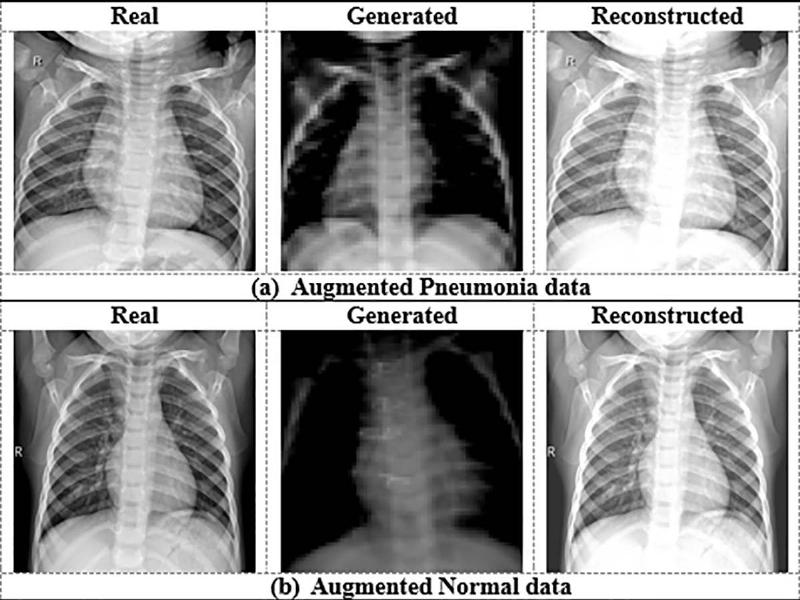

In [33]:
from IPython import display

display.Image('./figures/figure-7-12.jpg')

# Enter openAI API Key

In [40]:
from getpass import getpass

OPENAI_KEY = getpass('upload API Key')

upload API Key··········


In [41]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY

In [42]:
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model_name='gpt-4o', temperature=0)

# Setup The Multi Vector Retrival

In [43]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.runnables import RunnablePassthrough

# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text particularly for semantic retrieval.
These summaries will be embedded and used to retrieve the raw text or table elements
Give a detailed summary of the table or text below that is well optimized for retrieval.
For any tables also add in a one line description of what the table is about besides the summary.
Do not add additional words like Summary: etc.
Table or text chunk:
{element}
"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
summarize_chain = (
                    {"element": RunnablePassthrough()}
                      |
                    prompt
                      |
                    chatgpt
                      |
                    StrOutputParser() # extracts response as text
)

# Initialize empty summaries
text_summaries = []
table_summaries = []

text_docs = [doc.page_content for doc in docs]
table_docs = [table.page_content for table in tables]

text_summaries = summarize_chain.batch(text_docs, {"max_concurrency": 5})
table_summaries = summarize_chain.batch(table_docs, {"max_concurrency": 5})

In [44]:
text_summaries[0]

'The document is a research article titled "FLPneXAINet: Federated deep learning and explainable AI for improved pneumonia prediction utilizing GAN-augmented chest X-ray data," authored by Shuvo Biswas, Rafid Mostafiz, Mohammad Shorif Uddin, and Muhammad Shahin Uddin. It was published in PLOS One on July 17, 2025. The study addresses the challenges of diagnosing pneumonia, a severe lung infection, by introducing FLPneXAINet, a framework that integrates federated learning (FL), deep learning (DL), and explainable AI (XAI) to predict pneumonia using chest X-ray (CXR) images. The research utilized a Kaggle dataset of 8,402 CXR images, which were augmented using a CycleGAN network. Feature extraction was performed using pre-trained DL models (VGG16, NASNetMobile, MobileNet) and enhanced with ensemble DL models. Feature optimization involved recursive feature elimination (RFE), analysis of variance (ANOVA), and random forest (RF). Machine learning models, including KNN, naive bayes, SVM, an

In [46]:
table_summaries

[]

# Create Image summaries

In [47]:
import base64
import os
from langchain_core.messages import HumanMessage

# create a function to encode images
def encode_image(image_path):
    """Getting the base64 string"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

# create a function to summarize the image by passing a prompt to GPT-4o
def image_summarize(img_base64, prompt):
    """Make image summary"""
    chat = ChatOpenAI(model="gpt-4o", temperature=0)
    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url":
                                     f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content

In [48]:
def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """
    # Store base64 encoded images
    img_base64_list = []
    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval.
                Remember these images could potentially contain graphs, charts or
                tables also.
                These summaries will be embedded and used to retrieve the raw image
                for question answering.
                Give a detailed summary of the image that is well optimized for
                retrieval.
                Do not add additional words like Summary: etc.
             """

    # Apply to images
    for img_file in sorted(os.listdir(path)):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(path, img_file)
            base64_image = encode_image(img_path)
            img_base64_list.append(base64_image)
            image_summaries.append(image_summarize(base64_image, prompt))
    return img_base64_list, image_summaries

# Image summaries
IMG_PATH = './figures'
imgs_base64, image_summaries = generate_img_summaries(IMG_PATH)

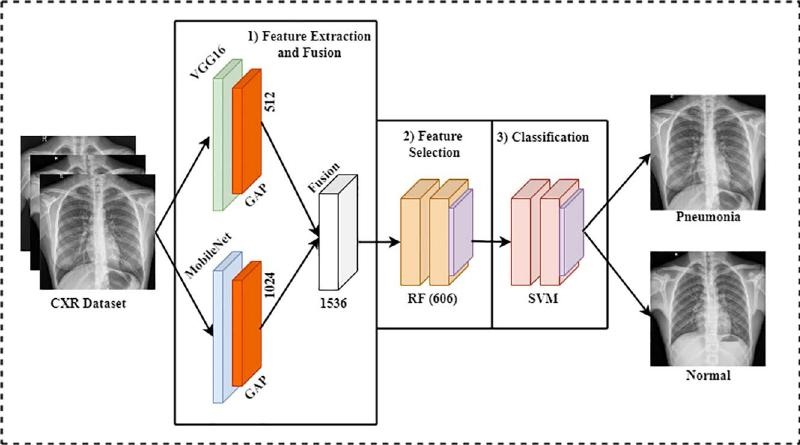

In [56]:
from IPython import display
from IPython.display import Image

# View one of the images
Image('/content/figures/figure-8-15.jpg')

In [57]:
image_summaries[1]

'Icon with a circular design featuring a red bookmark symbol in the center, surrounded by a blue and yellow ring. Below the icon, the text "Check for updates" is displayed in a bold, clear font. The overall design is simple and modern, suggesting a software or application update notification.'

In [58]:
%%sh
curl -fsSL https://packages.redis.io/gpg | sudo gpg --dearmor -o /usr/share/keyrings/redis-archive-keyring.gpg
echo "deb [signed-by=/usr/share/keyrings/redis-archive-keyring.gpg] https://packages.redis.io/deb $(lsb_release -cs) main" | sudo tee /etc/apt/sources.list.d/redis.list
sudo apt-get update  > /dev/null 2>&1
sudo apt-get install redis-stack-server  > /dev/null 2>&1
redis-stack-server --daemonize yes

deb [signed-by=/usr/share/keyrings/redis-archive-keyring.gpg] https://packages.redis.io/deb jammy main
Starting redis-stack-server, database path /var/lib/redis-stack


In [59]:
from langchain_openai import OpenAIEmbeddings

# details here: https://openai.com/blog/new-embedding-models-and-api-updates
openai_embed_model = OpenAIEmbeddings(model='text-embedding-3-small')

In [60]:
import uuid
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain_community.storage import RedisStore
from langchain_community.utilities.redis import get_client
from langchain_chroma import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings

def create_multi_vector_retriever(
    docstore, vectorstore, text_summaries, texts, table_summaries, tables,
    image_summaries, images
):
    """
    Create retriever that indexes summaries, but returns raw images or texts
    """
    id_key = "doc_id"

    # Create the multi-vector retriever
    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=docstore,
        id_key=id_key,
    )

    # Helper function to add documents to the vectorstore and docstore
    def add_documents(retriever, doc_summaries, doc_contents):
        doc_ids = [str(uuid.uuid4()) for _ in doc_contents]
        summary_docs = [
            Document(page_content=s, metadata={id_key: doc_ids[i]})
            for i, s in enumerate(doc_summaries)
        ]
        retriever.vectorstore.add_documents(summary_docs)
        retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

    # Add texts, tables, and images
    # Check that text_summaries is not empty before adding
    if text_summaries:
        add_documents(retriever, text_summaries, texts)

    # Check that table_summaries is not empty before adding
    if table_summaries:
        add_documents(retriever, table_summaries, tables)

    # Check that image_summaries is not empty before adding
    if image_summaries:
        add_documents(retriever, image_summaries, images)
    return retriever

In [61]:
# The vectorstore to use to index the summaries and their embeddings
chroma_db = Chroma(
    collection_name="mm_rag",
    embedding_function=openai_embed_model,
    collection_metadata={"hnsw:space": "cosine"},
)

In [64]:
# Initialize the storage layer - to store raw images, text and tables
client = get_client('redis://localhost:6379')
redis_store = RedisStore(client=client) # you can use filestore, memorystore, any other DB store also

In [65]:
# Create retriever
retriever_multi_vector = create_multi_vector_retriever(
    redis_store,  chroma_db,
    text_summaries, text_docs,
    table_summaries, table_docs,
    image_summaries, imgs_base64,
)

In [66]:
from IPython.display import HTML, display, Image
from PIL import Image
import base64
from io import BytesIO

def plt_img_base64(img_base64):
    """Disply base64 encoded string as image"""
    # Decode the base64 string
    img_data = base64.b64decode(img_base64)
    # Create a BytesIO object
    img_buffer = BytesIO(img_data)
    # Open the image using PIL
    img = Image.open(img_buffer)
    display(img)

In [78]:
# Check retrieval
query = "Tell me about the Data augmentation with CycleGAN"
docs = retriever_multi_vector.invoke(query, limit=5)
# We get 3 relevant docs
len(docs)

4

In [79]:
docs

[b'Table 2. CXR data distribution before and after GAN-augmentation.\n\nTrain set (80%) Class Original After GAN-augmentation PNEUMONIA 3418 3643 855 NORMAL 1266 3587 317 Total 4684 7230 1172\n\nDataset\n\nTest set (20%)\n\nCXR\n\nhttps://doi.org/10.1371/journal.pone.0324957.t002\n\n3.2 Data augmentation with CycleGAN\n\nCycleGAN (Cycle Consistent Generative Adversarial Network) makes fake samples from real images without needing a coupled training set. Three crucial components\xe2\x80\x94a discriminator, a generator, and two neural networks\xe2\x80\x94are utilized in this mechanism to extract new samples simultaneously. The proposed scheme illustrates the bidirectional execution of data translation. However, the discriminator\xe2\x80\x99s function is to judge the quality of the sample produced by the translation stage between the pneumonia and healthy X-ray image domains, and vice versa. This article employs this mechanism to generate synthetic samples, allowing the proposed EDL model

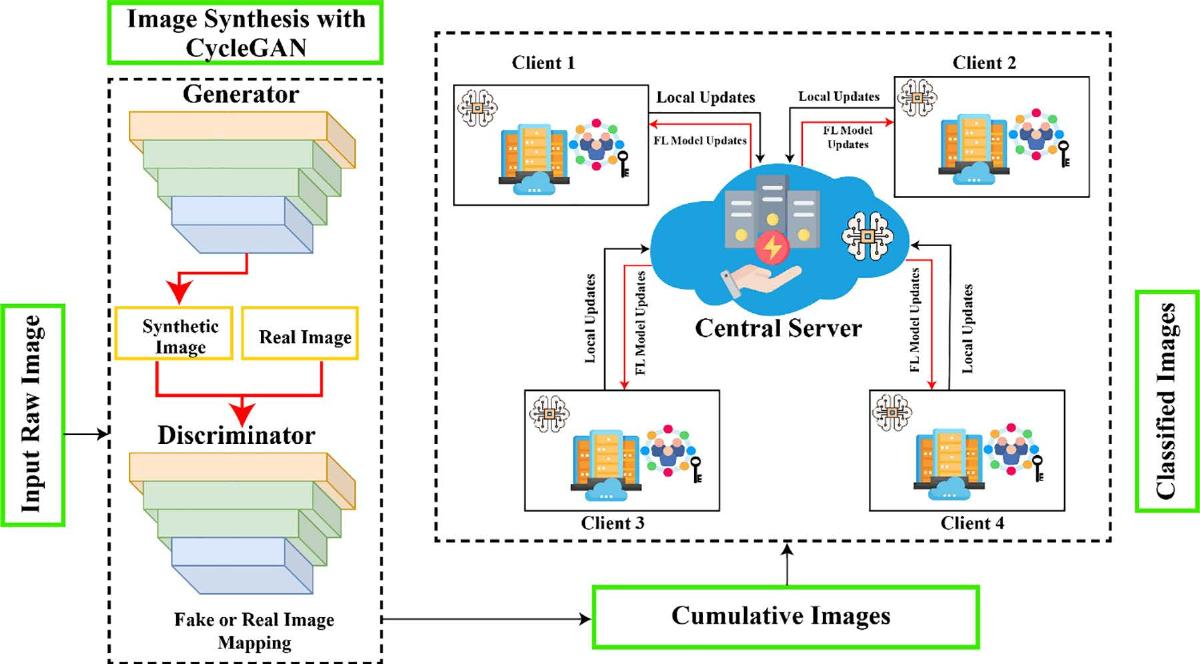

In [80]:
plt_img_base64(docs[2])